Đọc và kiểm tra dữ liệu

In [1]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("calories.csv")

# Xem 5 dòng đầu tiên
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [2]:
df.info()   # Kiểm tra kiểu dữ liệu, số lượng giá trị thiếu
print(df.describe()) # Thống kê dữ liệu (trung bình, min, max...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000  

Tiền xử lí dữ liệu

In [3]:
# Mã hóa Gender
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Trường hợp có nhiều null
df = df.dropna() # Loại bỏ dữ liệu bị thiếu

Lựa chọn đặc trưng

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tách đặc trưng và nhãn
X = df.drop(columns=['Calories'])
y = df['Calories']

# Chia dữ liệu: 70% train, 10% val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 của 80% = 10%

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42) # Lựa chọn n_estimators, max_depth phù hợp
model.fit(X_train, y_train)

# Dự đoán
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Đánh giá hiệu suất mô hình
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Đánh giá mô hình:")
print(f"Validation - MAE: {mae_val:.2f} | R²: {r2_val:.4f}")
print(f"Test       - MAE: {mae_test:.2f} | R²: {r2_test:.4f}")

# Lấy độ quan trọng của đặc trưng
importances = model.feature_importances_
feature_names = X.columns


Đánh giá mô hình:
Validation - MAE: 2.33 | R²: 0.9966
Test       - MAE: 2.34 | R²: 0.9969


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25360\218627217.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


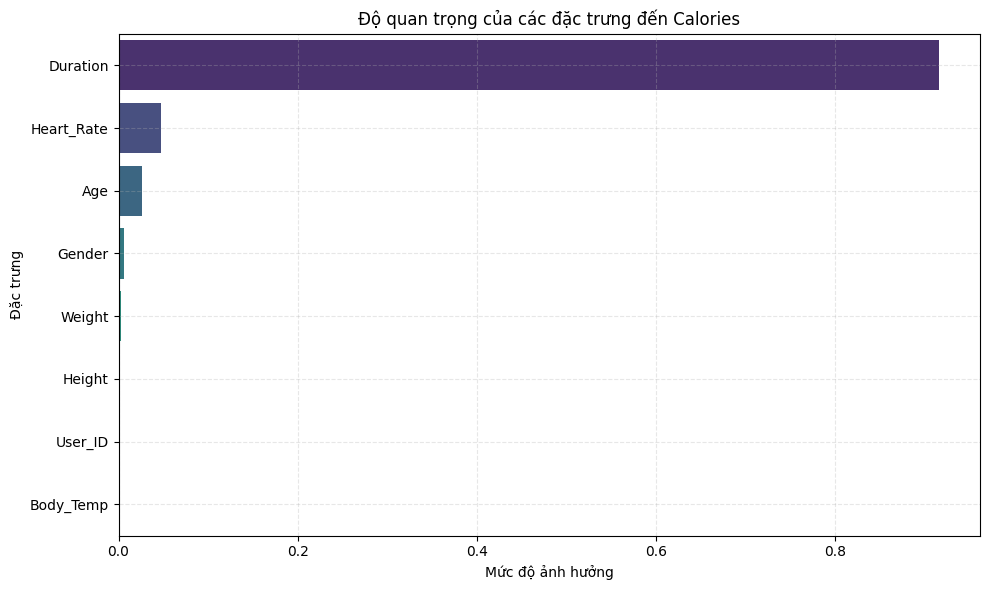

In [5]:
# Tạo DataFrame để dễ vẽ
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ độ quan trọng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Độ quan trọng của các đặc trưng đến Calories')
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Đặc trưng')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Thử loại bỏ các đặc trưng ít quan trọng và thử lại

In [ ]:
# Chọn các đặc trưng quan trọng
X = df[['Duration', 'Heart_Rate', 'Age','Gender', 'Weight']]
y = df['Calories']

# Chia dữ liệu: 70% train, 10% val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 của 80% = 10%

# Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Dự đoán
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Đánh giá hiệu suất mô hình
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Đánh giá mô hình:")
print(f"Validation - MAE: {mae_val:.2f} | R²: {r2_val:.4f}")
print(f"Test       - MAE: {mae_test:.2f} | R²: {r2_test:.4f}")


Đánh giá mô hình:
Validation - MAE: 2.28 | R²: 0.9968
Test       - MAE: 2.28 | R²: 0.9971


Tối ưu mô hình

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Khởi tạo mô hình Random Forest
rf = RandomForestRegressor(random_state=42)

# Định nghĩa các tham số cần tìm kiếm
param_dist = {
    'n_estimators': [50, 100, 150, 200, 300],             # Số lượng cây quyết định
    'max_depth': [None, 10, 20, 30, 40],                   # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10, 20],                   # Mẫu tối thiểu để chia node
    'min_samples_leaf': [1, 2, 4, 8],                      # Mẫu tối thiểu để tạo thành một lá
    'max_features': ['auto', 'sqrt', 'log2', None]         # Các cách lựa chọn đặc trưng tại mỗi node
}

# Khởi tạo RandomizedSearchCV với k-fold cross-validation (ở đây k=5) và số lần thử nghiệm tối đa (n_iter)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, 
                                   scoring='neg_mean_absolute_error', random_state=42)

# Tinh chỉnh tham số trên bộ validation
random_search.fit(X_train, y_train)

# In ra tham số tối ưu tìm được
print(f"Best parameters: {random_search.best_params_}")

# Dự đoán và đánh giá trên bộ validation với tham số tốt nhất
y_val_pred = random_search.predict(X_val)
mae = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f'Mean Absolute Error (MAE) trên Validation Set: {mae}')
print(f'R2 trên Validation Set: {r2_val}')

# Kiểm tra trên bộ Test với tham số tối ưu
y_test_pred = random_search.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Mean Absolute Error (MAE) trên Test Set: {mae_test}')
print(f'R2 trên Test Set: {r2_test}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
155 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
102 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean Absolute Error (MAE) trên Validation Set: 1.5605117222222222
R2 trên Validation Set: 0.9980573379539752
Mean Absolute Error (MAE) trên Test Set: 1.584829777777778
R2 trên Test Set: 0.9982516937730106


Triển khai thực tế

In [13]:
import joblib
# Lưu mô hình
joblib.dump(random_search.best_estimator_, 'random_forest_model.pkl')

# Tải lại mô hình khi cần
model = joblib.load('random_forest_model.pkl')


In [ ]:
import numpy as np
import joblib

# Tải mô hình đã huấn luyện (sau khi tối ưu hóa)
model = joblib.load('random_forest_model.pkl')

# Hàm cho phép người dùng nhập input và dự đoán
def predict_calories():
    print("Nhập các giá trị sau để dự đoán lượng calo sử dụng:")

    # Yêu cầu người dùng nhập các giá trị đặc trưng
    duration = float(input("Duration (thời gian tập luyện): "))
    heart_rate = float(input("Heart Rate (nhịp tim): "))
    age = int(input("Age (tuổi): "))
    gender = input("Gender (giới tính) [Male/Female]: ").strip().lower()
    weight = float(input("Weight (cân nặng): "))

    # Chuyển đổi giới tính thành giá trị số (Male = 0, Female = 1)
    if gender == 'male':
        gender_value = 0
    elif gender == 'female':
        gender_value = 1
    else:
        print("Giới tính không hợp lệ! Vui lòng nhập male hoặc female.")
        return

    # Tạo mảng đặc trưng từ các giá trị người dùng nhập
    features = np.array([duration, heart_rate, age, gender_value, weight]).reshape(1, -1)

    # Dự đoán lượng calo sử dụng
    prediction = model.predict(features)

    # In ra kết quả dự đoán
    print(f"Dự đoán lượng calo sử dụng là: {prediction[0]:.2f} kcal")

# Gọi hàm dự đoán
predict_calories()

Nhập các giá trị sau để dự đoán lượng calo sử dụng:
Dự đoán lượng calo sử dụng là: 212.52 kcal


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
